#**Credit Card Fraud Detection**



##About Project

Đồ án giới thiệu các phương pháp thống kê và học máy để phát hiện gian lận thẻ tín dụng. Bằng việc sử dụng 284807 giao dịch thẻ tín dụng của châu Âu trong tháng 09/2013, đồ án ứng dụng các mô hình như mô hình Logistic Regression, Decision Trees, Random Forest. Ngoài ra, đồ án cũng đưa ra cách xử lý trong trường hợp dữ liệu mất cân bằng và thông qua kết quả so sánh các mô hình.




##About dataset

###Context

Yêu cầu: Phát hiện gian lận thẻ tín dụng để khách hàng không bị tính phí cho các mặt hàng mà họ không mua.

Link dataset from Kaggel: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

###Content
Bộ dữ liệu chứa các giao dịch bằng thẻ tín dụng xảy ra trong 2 ngày, vào tháng 9 năm 2013 bởi các chủ thẻ ở châu Âu. Trong đó, có 492 vụ gian lận trong tổng số 284.807 giao dịch. Bộ dữ liệu rất mất cân bằng, trường hợp giao dịch lừa đảo (fraud transaction) chiếm 0,172% trong tất cả các giao dịch.

Bộ dữ liệu chứa các biến đầu vào là kết quả của phương pháp giảm chiều dữ liệu PCA. Do vấn đề bảo mật nên không thể cung cấp tên các feature ban đầu và thông tin cơ bản khác về dữ liệu.



*   Các feature V1, V2, … V28 là thông tin cá nhân của chủ thẻ và là kết quả có được bởi PCA.

Các feature duy nhất chưa được chuyển đổi với PCA là 'Time' và 'Amount'.

*   'Time': là thời gian tính bằng giây kể từ giao dịch đang ghi nhận đến giao dịch đầu tiên được ghi nhận trong ngày.
*   'Amount': là số tiền giao dịch (USD).
*   'Class': là biến phân loại nhận giá trị 1 trong trường hợp gian lận và giá trị 0 nếu không gian lận.

## 1. Import necessary libraries

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from collections import Counter
from imblearn.over_sampling import SMOTE

##2. Load data

In [ ]:
##Load data
df1 = pd.read_csv("creditcard.csv")
df = pd.DataFrame(df1)

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


##3. Exploratory Data Analysis

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Dataset có 30 biến là số thực và 1 biến Class là số nguyên và không có missing data

In [ ]:
#Dataframe of Time and Amount
df[['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


Số tiền giao dịch trung bình là 88.349619 USD

Số tiền giao dịch lớn nhất là 25691.160000 USD

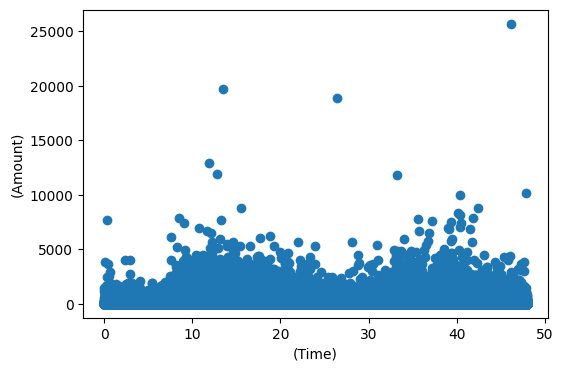

In [ ]:
# Checking outliers
# Scatter plot
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df['Time'].div(3600),df['Amount'])
# x-axis label
ax.set_xlabel('(Time)')
# y-axis label
ax.set_ylabel('(Amount)')
plt.show()

Dựa vào biểu đồ, dễ dàng nhận thấy feature này có outliers.

In [ ]:
fraud = df[df['Class']==1]
legal = df[df['Class']==0]

In [ ]:
# Dataframe of the amount of fraud transaction and legal transaction
pd.concat([fraud['Amount'].describe(), legal['Amount'].describe()], axis=1)

,Amount,Amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


###Check counts of fraud transactions (1) and legal transactions (0)




####Pie chart

In [ ]:
fraud_1 = fraud['Class'].count()
legal_0 = legal['Class'].count()

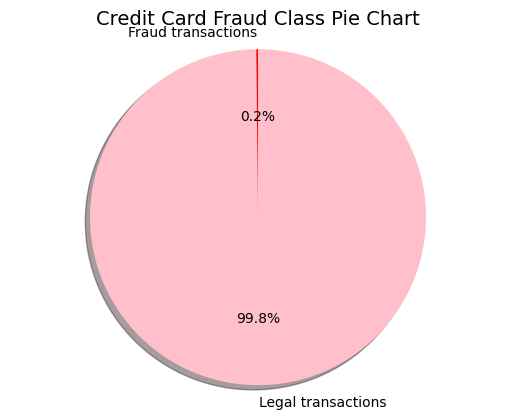

Number of legal transactions: 284315 (account for: 99.83 %)
Number of fraud transactions: 492 (account for: 0.17 %)


In [ ]:
# Pie chart
labels= ['Fraud transactions', 'Legal transactions']
colors=['red', 'pink']
sizes= [fraud_1, legal_0]
plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%', shadow=True)
plt.title('Credit Card Fraud Class Pie Chart', fontsize = 14)
plt.axis('equal')
plt.show()
print(f'Number of legal transactions: {legal_0} (account for: {round(legal_0 / (legal_0+fraud_1) * 100, 2)} %)')
print(f'Number of fraud transactions: {fraud_1} (account for: {round(fraud_1 / (legal_0+fraud_1) * 100, 2)} %)')

Bộ dữ liệu này chứa các giao dịch xảy ra trong 2 ngày, trong đó có 492 giao dịch gian lận và 284316 giao dịch hợp lệ trong tổng số 284.807 giao dịch.

Bộ dữ liệu rất mất cân bằng, trường hợp giao dịch gian lận chiếm 0,172% trong tất cả các giao dịch, còn lại chiếm 99.83%.



####Heatmap

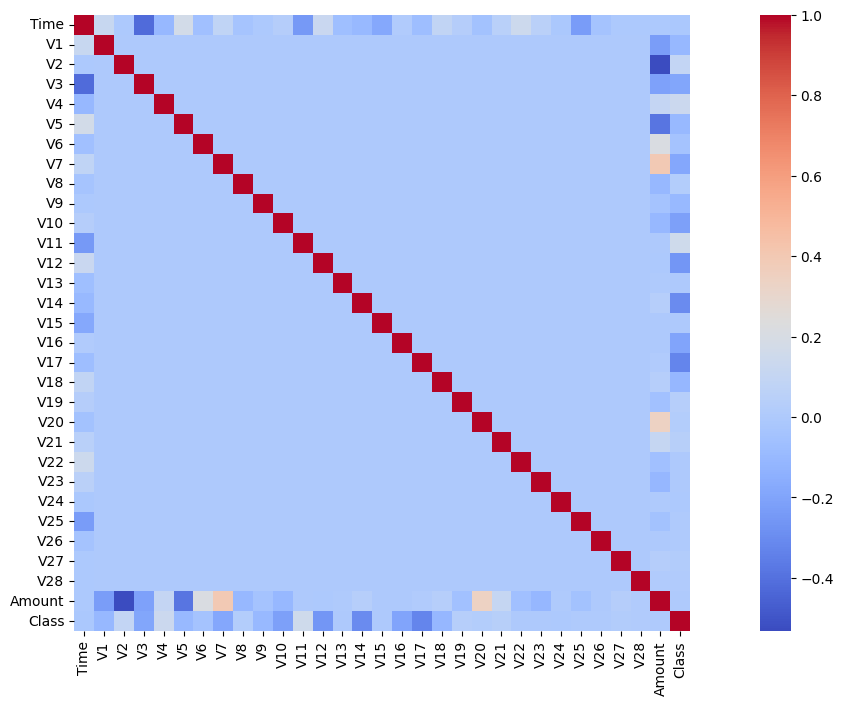

In [ ]:
# Heatmap
f, ax1= plt.subplots(1,figsize =( 18, 8))
sns.heatmap(df.corr(), vmax = 1, square=True, cmap = 'coolwarm');
plt.show()


###Distribution of Transaction Time

KeyError: ignored

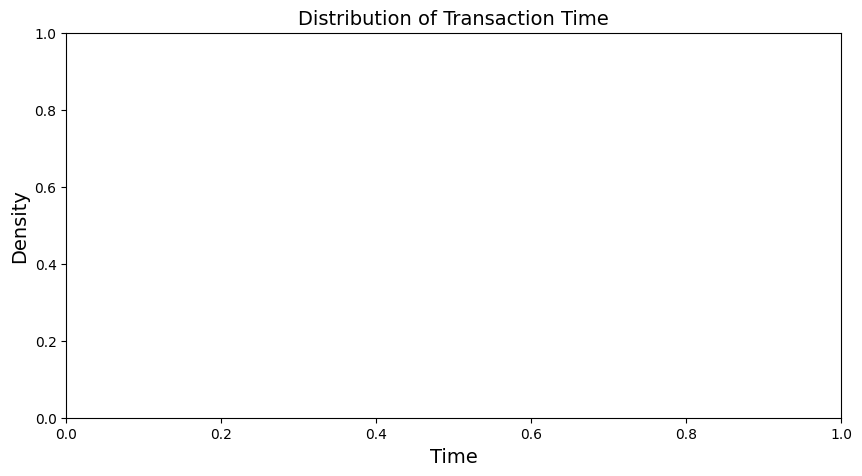

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Distribution of Transaction Time', fontsize=14)
plt.xlabel('Time', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
sns.distplot(df['Time'].div(3600), color='orange', kde_kws={'linewidth': 2}, bins=100)

Hầu hết các giao dịch diễn ra vào ban ngày.

###Distribution of Fraud Transactions (Time)

<ipython-input-23-1ce7207804b8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud['Time'].div(3600), color='red', kde_kws={'linewidth': 2}, bins=100)


<Axes: title={'center': 'Distribution of Fraud Transactions'}, xlabel='Time', ylabel='Density'>

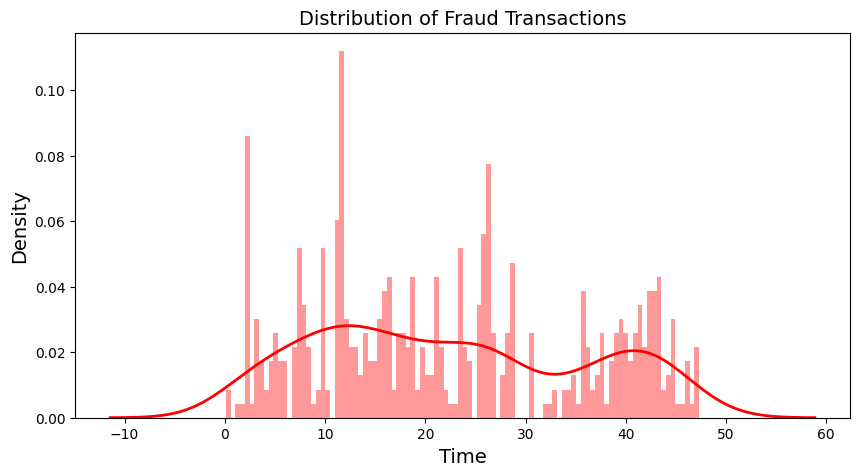

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Distribution of Fraud Transactions', fontsize=14)
plt.xlabel('Time', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
sns.distplot(fraud['Time'].div(3600), color='red', kde_kws={'linewidth': 2}, bins=100)

###Distribution of Legal Transactions (Time)

<ipython-input-24-c56af276650f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(legal['Time'].div(3600), color='darkblue', kde_kws={'linewidth': 2}, bins=100)


<Axes: title={'center': 'Distribution of Legal Transactions'}, xlabel='Time', ylabel='Density'>

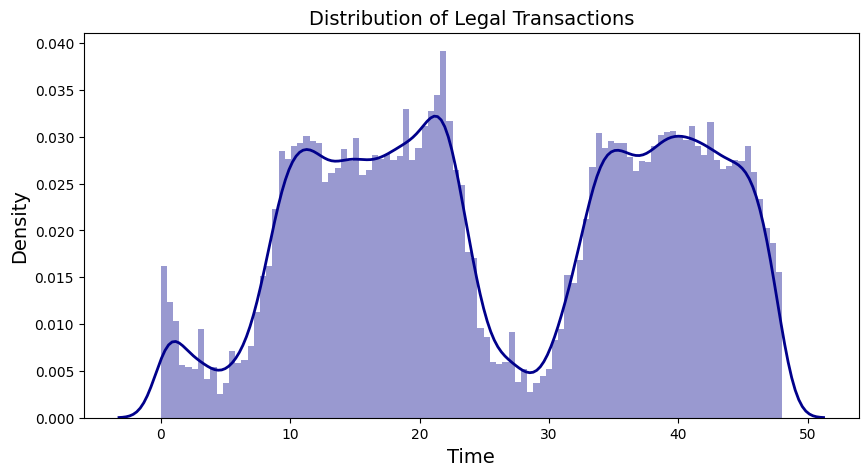

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('Time', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Distribution of Legal Transactions', fontsize=14)
sns.distplot(legal['Time'].div(3600), color='darkblue', kde_kws={'linewidth': 2}, bins=100)

In [ ]:
Am_fraud = df[(df['Amount'] >= 200)  & (df['Amount'] < 2000) & (df['Class']==1)]
fr1 = Am_fraud.iloc[:, Am_fraud.columns == ('Amount') ]
fr2 = Am_fraud.iloc[:, Am_fraud.columns == ('Class') ]
fr3 = pd.concat([fr1, fr2], axis=1)

Am_legal = df[(df['Amount'] >= 200)  & (df['Amount'] < 2000) & (df['Class']==0)]
fr4 = Am_legal.iloc[:, Am_legal.columns == ('Amount') ]
fr5 = Am_legal.iloc[:, Am_legal.columns == ('Class') ]
fr6 = pd.concat([fr4, fr5], axis=1)

###Distribution of Transaction Amount


<ipython-input-25-a7ffa3baf755>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'], color='green', kde_kws={'linewidth': 1}, bins=100)


<Axes: title={'center': 'Distribution of Transaction Amount'}, xlabel='Amount', ylabel='Density'>

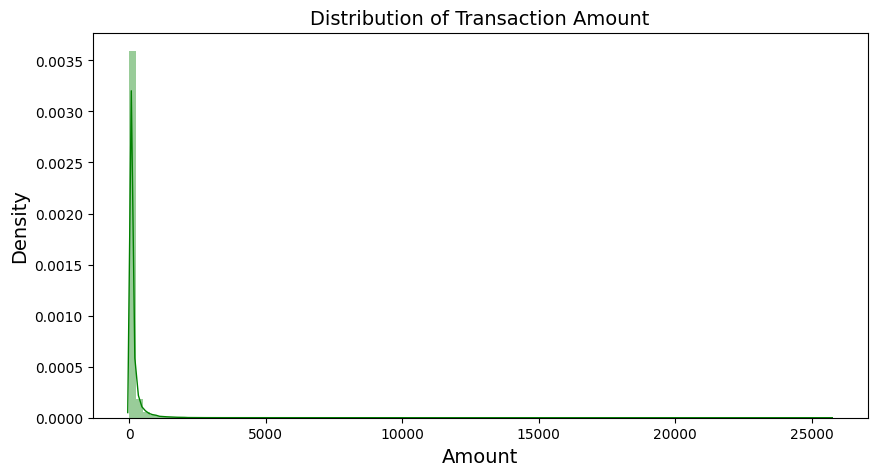

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Distribution of Transaction Amount', fontsize=14)
plt.xlabel('Amount', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
sns.distplot(df['Amount'], color='green', kde_kws={'linewidth': 1}, bins=100)

###Distribution of Fraud Transactions (Amount)

<ipython-input-49-feaffda4e1ab>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud['Amount'], color='purple', kde_kws={'linewidth': 1}, bins=100)


<Axes: title={'center': 'Distribution of Fraud Transactions'}, xlabel='Amount', ylabel='Density'>

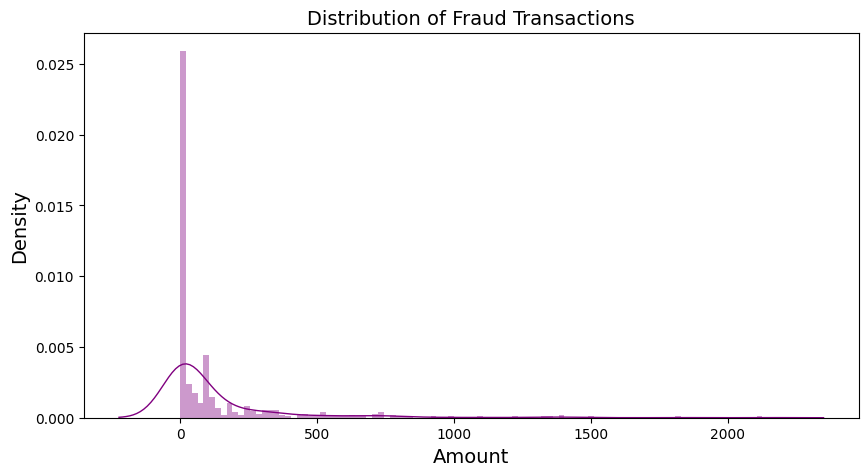

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Distribution of Fraud Transactions', fontsize=14)
plt.xlabel('Amount', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
sns.distplot(fraud['Amount'], color='purple', kde_kws={'linewidth': 1}, bins=100)

###Distribution of Legal Transactions (Amount)

<ipython-input-50-1b9245d74a5b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(legal['Amount'], color='blue', kde_kws={'linewidth': 1}, bins=100)


<Axes: title={'center': 'Distribution of Legal Transactions'}, xlabel='Amount', ylabel='Density'>

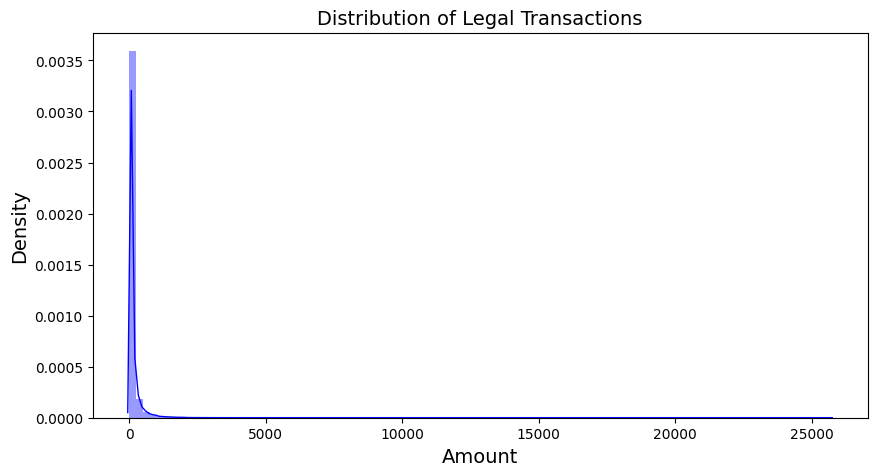

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Distribution of Legal Transactions', fontsize=14)
plt.xlabel('Amount', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
sns.distplot(legal['Amount'], color='blue', kde_kws={'linewidth': 1}, bins=100)

Phần lớn các giao dịch là tương đối nhỏ.

Hầu hết các giao dịch hàng ngày không quá đắt, nhưng có khả năng các giao dịch gian lận cũng đang xảy ra.

##4. Scaling the data

In [ ]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


####Correlation matrices

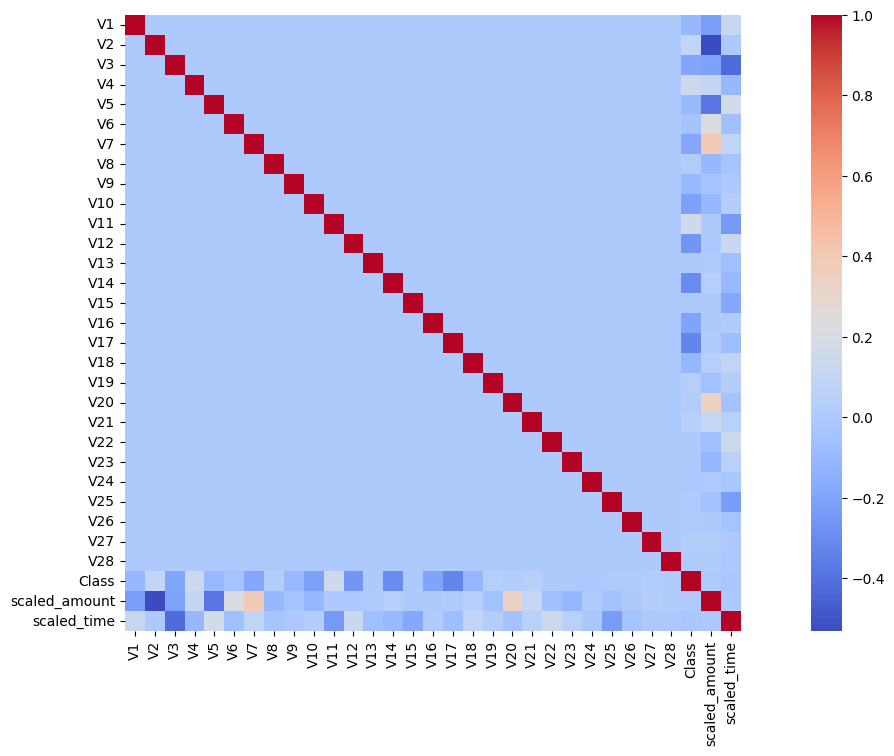

In [ ]:
f, ax1= plt.subplots(1,figsize =( 18, 8))
sns.heatmap(df.corr(), vmax = 1, square=True, cmap = 'coolwarm');
plt.show()

##5. Building Models

### Spliting the data

Chia tập dữ liệu thành 80%-20% để training và testing trước khi huấn luyện mô hình nào.

*   X: tất cả trừ Class và Time
*   y: Class (target variable)

In [ ]:
X = df.drop(['Class','scaled_time'], axis=1)
y = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(f'Number of transactions in training set: {X_train.shape[0]}')
print(f'Number of transactions in testing set: {X_test.shape[0]}')
print(f'Number of transactions in whole set: {X.shape[0]}')
print(f"Counts of fraud transactions: {y_train.value_counts()[1]}")
print(f"Counts of normal transactions: {y_train.value_counts()[0]}")

Number of transactions in training set: 227845
Number of transactions in testing set: 56962
Number of transactions in whole set: 284807
Counts of fraud transactions: 391
Counts of normal transactions: 227454


###SWOTE

Xử lý dữ liệu mất cân bằng bằng SMOTE trước khi huấn luyện mô hình:

Có một số phương pháp lấy mẫu lại dữ liệu bị sai lệch:



*   Undersampling: Kỹ thuật lấy mẫu Undersampling sẽ giảm các mẫu dữ liệu trong lớp đa số để có cùng số với lớp thiểu số.
*   Oversampling: Kỹ thuật lấy mẫu Oversampling sẽ tăng các mẫu dữ liệu trong lớp thiểu số bằng cách nhân đôi để có cùng số với lớp đa số.
*   SMOTE: Kỹ thuật SMOTE sẽ cân bằng các lớp tập dữ liệu bằng cách tạo thêm mẫu cho lớp thiểu số.

Trong đồ án này, lựa chọn phương pháp SMOTE do:

*   Undersampling cắt bớt quá nhiều dữ liệu.
*   Oversampling tạo ra quá nhiều dữ liệu trùng lặp.






In [ ]:
print('Original dataset shape %s' % Counter(y_train))
smt = SMOTE(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_smt))

Original dataset shape Counter({0: 227454, 1: 391})
Resampled dataset shape Counter({0: 227454, 1: 227454})


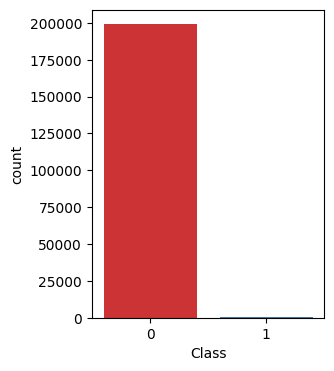

In [ ]:
f,ax = plt.subplots(figsize=(3,4))
ax = sns.countplot(x=y_train, data=df, palette='Set1')
plt.show()

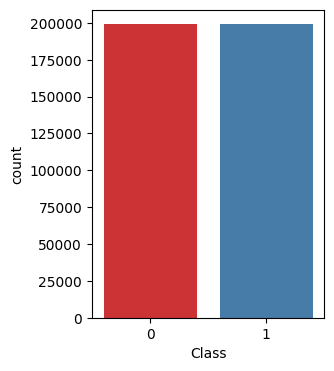

In [ ]:
f,ax = plt.subplots(figsize=(3,4))
ax = sns.countplot(x=y_train_smt, data=df, palette='Set1')
plt.show()

###Modeling


####Confusion Matrix
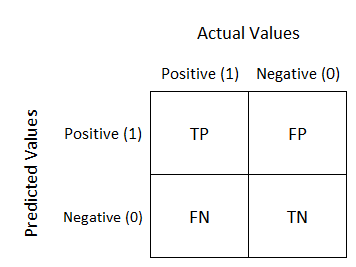

Confusion Matrix là đồ thị trực quan của 2 yếu tố Thực tế và Dự đoán. Nó đo lường hiệu suất của mô hình Classification techniques Machine Learning và trông giống như một cấu trúc giống bảng.

TP: True Positive: Các giá trị thực sự Positive và được dự đoán là Positive.

FP: False Positive: Các giá trị thực sự là Negative nhưng được dự đoán sai là Positive. Còn được gọi là Lỗi loại I.

FN: False Negative: Các giá trị thực sự là Positive nhưng được dự đoán sai là Negative. Còn được gọi là Lỗi loại II.

TN: True Negative: Các giá trị thực sự Negative và được dự đoán là Negative.

####Classification Report

Báo cáo phân loại là thước đo đánh giá hiệu suất trong Machine Learning.

*   Accuracy: tỷ lệ của tổng số dự đoán đúng

  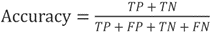
*   Precision: kiểm tra xem có bao nhiêu kết quả thực sự là kết quả tích cực trong tổng số các kết quả được dự đoán tích cực.
  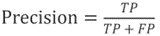
*   Recall: kiểm tra các kết quả dự đoán tích cực chính xác trong tổng số các kết quả tích cực.

  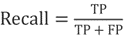
*   F beta score  là trung bình hài hòa của accuracy và recall, thể hiện sự đóng góp của cả hai điểm. Sự đóng góp phụ thuộc vào giá trị beta trong công thức dưới đây.

  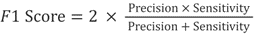
*   Giá trị beta mặc định là 1 cung cấp cho chúng ta công thức của F1 Score, trong đó đóng góp của Accuracy và Gọi lại là như nhau. Điểm F1 càng cao thì mô hình càng tốt.
















####Logistic Regression

**Định nghĩa:**
Hồi quy logistic dự đoán đầu ra của một biến phụ thuộc phân loại. Do đó, kết quả phải là một giá trị phân loại hoặc rời rạc. Nó có thể là Có hoặc Không, 0 hoặc 1, đúng hoặc Sai, v.v. nhưng thay vì đưa ra giá trị chính xác là 0 và 1, nó đưa ra các giá trị xác suất nằm trong khoảng từ 0 đến 1.




*   Phương trình hồi quy logistic được lấy từ hồi quy tuyến tính có dạng:

  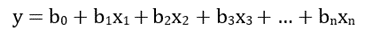

*   Trong hồi quy logistic, y chỉ có thể nằm trong khoảng từ 0 đến 1, vì vậy, hãy chia phương trình trên cho (1-y):

  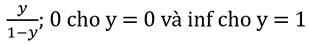

*   Nhưng ta cần phạm vi từ -∞ đến +∞, lấy logarit của phương trình, trở thành:

  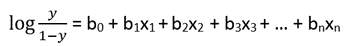













**Lí do sử dụng Logistic Regression:** có khả năng cô lập
dữ liệu thuộc về các lớp nhị phân khác nhau.

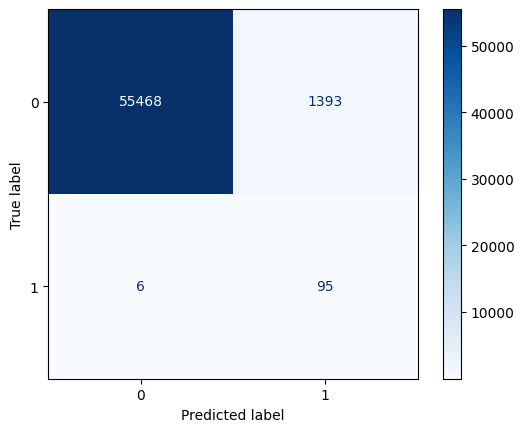

In [ ]:
model_lrsmt =  LogisticRegression()
model_lrsmt.fit(X_train_smt, y_train_smt)
predictions = model_lrsmt.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model_lrsmt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_lrsmt.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred_2 = model_lrsmt.predict(X_test)
print(classification_report(y_test, y_pred_2, digits=4))

              precision    recall  f1-score   support

           0     0.9999    0.9755    0.9875     56861
           1     0.0638    0.9406    0.1196       101

    accuracy                         0.9754     56962
   macro avg     0.5319    0.9580    0.5536     56962
weighted avg     0.9982    0.9754    0.9860     56962



Với mô hình hồi quy Logistic, nắm bắt được 95 trong số 101 trường hợp gian lận trong tập dữ liệu thử nghiệm và 1393 giao dịch bị đánh dấu nhầm là gian lận.

####Decision Tree

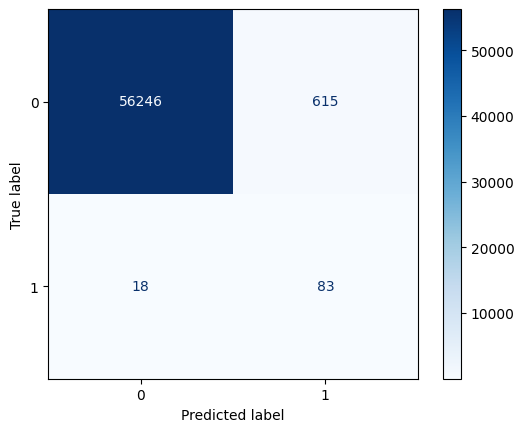

In [ ]:
params_dt = {'max_depth': 16,
             'max_features': "sqrt"}
model_dtsmt = DecisionTreeClassifier(**params_dt)
model_dtsmt.fit(X_train_smt, y_train_smt)
predictions = model_dtsmt.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model_dtsmt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dtsmt.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

Với DecisionTreeClassifier, 83 trong số 101 trường hợp gian lận trong tập dữ liệu thử nghiệm đã được phát hiện nhưng nó hoạt động rất tốt khi cho thấy ít false - positive hơn với 615 giao dịch.

In [ ]:
y_pred_2 = model_dtsmt.predict(X_test)
print(classification_report(y_test, y_pred_2, digits=4))

              precision    recall  f1-score   support

           0     0.9997    0.9892    0.9944     56861
           1     0.1189    0.8218    0.2078       101

    accuracy                         0.9889     56962
   macro avg     0.5593    0.9055    0.6011     56962
weighted avg     0.9981    0.9889    0.9930     56962



#### Random Forest

**Định nghĩa:** Rừng ngẫu nhiên là một bộ phân loại chứa một số cây quyết định trên các tập hợp con khác nhau của tập dữ liệu nhất định và lấy giá trị trung bình để cải thiện độ chính xác dự đoán của tập dữ liệu đó

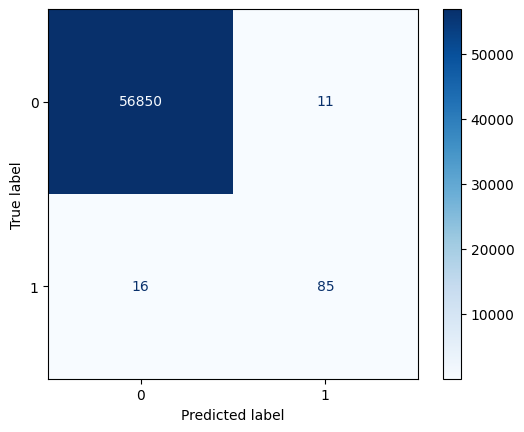

In [ ]:
model_rfsmt = RandomForestClassifier()
model_rfsmt.fit(X_train_smt, y_train_smt)
predictions = model_rfsmt.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model_rfsmt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rfsmt.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

RandomForestClassifier nắm bắt được 85 trong số 101 trường hợp gian lận và chỉ có 12 trường hợp bị phát hiện nhầm giao dịch bình thường thành giao dịch gian lận

In [ ]:
y_pred_2 = model_rfsmt.predict(X_test)
print(classification_report(y_test, y_pred_2, digits=4))

              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998     56861
           1     0.8854    0.8416    0.8629       101

    accuracy                         0.9995     56962
   macro avg     0.9426    0.9207    0.9314     56962
weighted avg     0.9995    0.9995    0.9995     56962



Mô hình Random Forest cho kết quả f1_score tốt nhất nhưng thời gian đào tạo dài và tốn kém về mặt tính toán